In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
import pickle

In [3]:
# define input sequence
raw = pd.read_csv("../Outliers.csv")

In [4]:
# retrieve the array and reshape
data = raw.Price.values.reshape(-1, 1)

In [5]:
# identify outliers in the training dataset using Isolation Forest
pctOutliers = 0.1
model = IsolationForest(contamination=pctOutliers)
yhat = model.fit_predict(data)

# serialise and save model for reusability 
pickle.dump(model, open("isolationForest", 'wb'))

In [6]:
# load model
# load_model = pickle.load(open("isolationForest", 'rb'))

In [7]:
# flag anomalies in dataset
raw["anomaly"] = yhat
raw["anomaly"] = raw.anomaly == -1

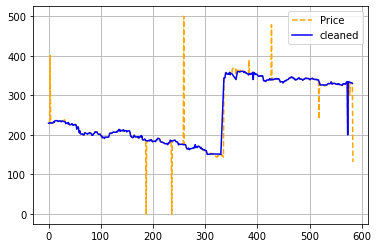

In [8]:
# visualise
tempDF = raw.drop(raw[raw.Price == raw.Price[raw.anomaly == True].max()].index)
fig, ax = plt.subplots()
tempDF.Price.plot(ax=ax, color="orange", style="--", label="Price")
tempDF.Price.drop(tempDF[tempDF.anomaly == True].index).plot(ax=ax, color="b", label="cleaned")
ax.legend()
ax.grid()

# Evaluation

how do we know that what we have found is scientifically accurate?

Text(0.5, 1.0, 'Raw')

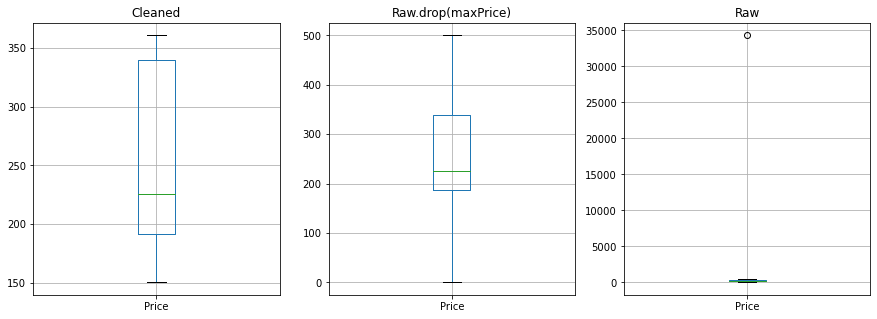

In [30]:
fig, ax = plt.subplots(1,3, figsize=[15,5])

raw[raw.anomaly == False].boxplot("Price", ax=ax[0])
ax[0].set_title("Cleaned")

raw.drop(raw[raw.Price == raw.Price[raw.anomaly == True].max()].index).boxplot("Price", ax=ax[1])
ax[1].set_title("Raw.drop(maxPrice)")

raw.boxplot("Price", ax=ax[2])
ax[2].set_title("Raw")

Text(0.5, 1.0, 'Cleaned')

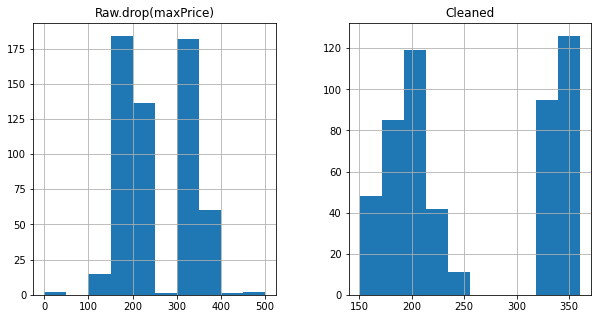

In [33]:
fig, ax = plt.subplots(1,2, figsize=[10,5])

raw.drop(raw[raw.Price == raw.Price[raw.anomaly == True].max()].index).hist("Price", ax=ax[0])
ax[0].set_title("Raw.drop(maxPrice)")
raw[raw.anomaly == False].hist("Price", ax=ax[1])
ax[1].set_title("Cleaned")